In [43]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np

# Function to generate n random bits using quantum mechanics
def quantum_random_number_generator(n):
    # Create a quantum circuit with one qubit and one classical bit
    qc = QuantumCircuit(1, 1)
    
    # Apply a Hadamard gate to create superposition
    qc.h(0)
    
    # Measure the qubit
    qc.measure(0, 0)
    
    # Execute the circuit on the actual hardware
    service = QiskitRuntimeService()
    backend = service.backend(name='ibm_brisbane')
    tqc = transpile(qc, backend=backend, optimization_level=2)
    
    # Assemble and run the circuit n times
    sampler = Sampler(mode=backend)
    job = sampler.run([tqc], shots=n)
    result = job.result()
    
    # Get the counts of measurement results (0s and 1s)
    counts = result.get_counts()
    
    # Generate the random bitstring
    bitstring = []
    for _ in range(n):
        outcome = np.random.choice(list(counts.keys()), p=[counts.get('0', 0)/n, counts.get('1', 0)/n])
        bitstring.append(outcome)
    
    return bitstring

# Generate 10 random bits
random_bits = quantum_random_number_generator(2)
print("Random bits:", ''.join(random_bits))

AttributeError: 'PrimitiveResult' object has no attribute 'get_counts'

In [45]:
service = QiskitRuntimeService()
job_id = "cw8pjg2bhxtg008wp0yg"
job = service.job(job_id)

result = job.result()
print(result[0])

SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=2, num_bits=1>)), metadata={'circuit_metadata': {}})


In [46]:
result[0].data

DataBin(c=BitArray(<shape=(), num_shots=2, num_bits=1>))

In [21]:
from itertools import product

p = {}
for i in product(range(1,7), repeat=3):
    if sum(i) not in  p:
        p[sum(i)] = 0

    p[sum(i)] += 1

print(p)

{3: 1, 4: 3, 5: 6, 6: 10, 7: 15, 8: 21, 9: 25, 10: 27, 11: 27, 12: 25, 13: 21, 14: 15, 15: 10, 16: 6, 17: 3, 18: 1}


In [13]:
from collections import Counter

a = Counter( [sum(i) for i in product(range(1,7), repeat=3)] )

print()

0


[7, 8, 9, 10, 11, 12, 8, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14, 15, 11, 12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 17, 8, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14, 15, 11, 12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 17, 13, 14, 15, 16, 17, 18, 9, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14, 15, 11, 12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 17, 13, 14, 15, 16, 17, 18, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 11, 12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 17, 13, 14, 15, 16, 17, 18, 14, 15, 16, 17, 18, 19, 15, 16, 17, 18, 19, 20, 11, 12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 17, 13, 14, 15, 16, 17, 18, 14, 15, 16, 17, 18, 19, 15, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20, 21, 12, 13, 14, 15, 16, 17, 13, 14, 15, 16, 17, 18, 14, 15, 16, 17, 18, 19, 15, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20, 21, 17, 18, 19, 20, 21, 22, 8, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14, 15, 11, 12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 17, 13, 14, 15, 16, 17, 18, 9, 1

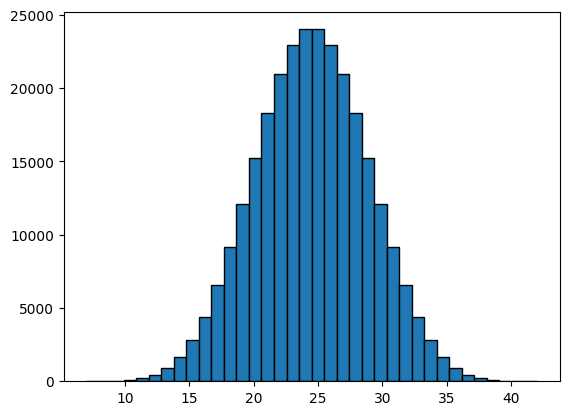

In [40]:
import matplotlib.pyplot as plt

n = 7
d = [sum(i) for i in product(range(1,7), repeat=n)]

plt.hist(d, bins=5*n+1, edgecolor='k')
print(d)
